In [76]:
import scanpy as sc

In [77]:
import numpy as np
import scanpy as sc
import pandas as pd
import scipy as sp
import muon as mu
from muon import atac as ac
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 
import seaborn as sns
# sc.set_figure_params(dpi=800)
matplotlib.rcdefaults()

from pathlib import Path
matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

from matplotlib import rcParams

FIGSIZE = (5, 5)
rcParams["figure.figsize"] = FIGSIZE

In [118]:
colors = plt.cm.Set1.colors
# Define Set1 palette from Seaborn
# palette = sns.color_palette("Set1", as_cmap=False)

In [119]:
adata_celldreamer_atac = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc10k_multimodal/generated_cells_1_atac.h5ad")
adata_real = mu.read("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed/atac/pbmc/pbmc10k_multiome_test.h5mu")
adata_celldreamer_rna = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc10k_multimodal/generated_cells_1_rna.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [120]:
adata_rna = sc.AnnData(X=np.concatenate([adata_real["rna"].X.A, adata_celldreamer_rna.X.A]),
                      obs=pd.DataFrame({"dataset_type":["Real" for _ in range(len(adata_real["rna"]))] + ["Generated" for _ in range(len(adata_real["rna"]))]}))

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [121]:
shuffled_indices = np.random.permutation(adata_rna.n_obs)

In [122]:
sc.tl.pca(adata_rna)
sc.pp.neighbors(adata_rna)
sc.tl.umap(adata_rna)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


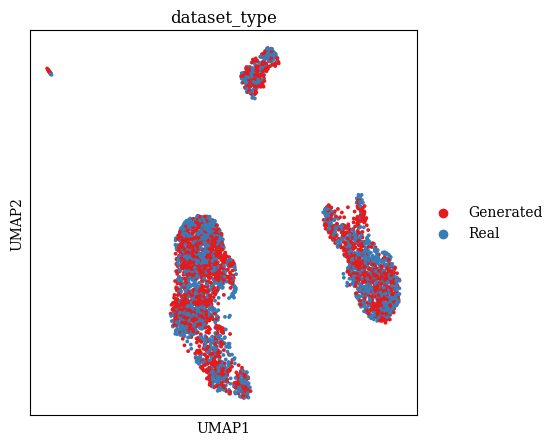

In [123]:
sc.pl.umap(adata_rna[shuffled_indices], color="dataset_type", palette=colors, s=30,add_outline=False, save="RNA.png")

In [124]:
adata_atac = sc.AnnData(X=np.concatenate([adata_real["atac"].X.A, adata_celldreamer_atac.X.A]),
                      obs=pd.DataFrame({"dataset_type":["Real" for _ in range(len(adata_real["atac"]))] + ["Generated" for _ in range(len(adata_celldreamer_atac))]}))

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [125]:
sc.tl.pca(adata_atac)
sc.pp.neighbors(adata_atac)
sc.tl.umap(adata_atac)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


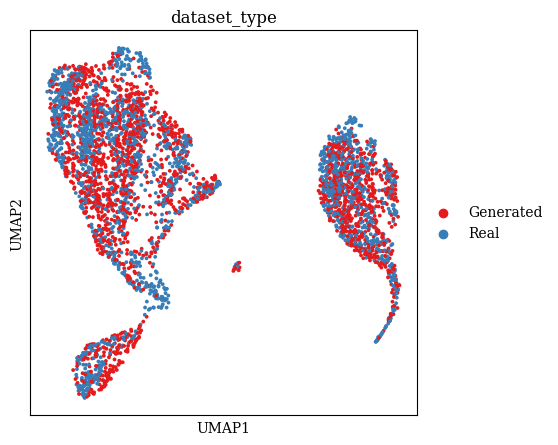

In [126]:
sc.pl.umap(adata_atac[shuffled_indices], color="dataset_type", palette=colors, s=30, add_outline=False, save="ATAC.png")

## Check robustness

In [108]:
adata_celldreamer_rna.X=adata_celldreamer_rna.layers["X_counts"]
adata_real["rna"].X=adata_real["rna"].layers["X_counts"]

In [109]:
adata_celldreamer_rna.X.A.max(1).mean()

181.638

In [58]:
adata_real["rna"].X.A.max(1).mean()

187.602

In [59]:
adata_celldreamer_rna.X.A.max(1)

array([182., 178., 164., ..., 241., 136., 488.], dtype=float32)

In [62]:
adata_real["rna"].X.A.max(1)

array([461., 423., 469., ..., 182., 197., 167.], dtype=float32)

In [63]:
adata_rna = sc.AnnData(X=np.concatenate([adata_real["rna"].X.A, adata_celldreamer_rna.X.A]),
                      obs=pd.DataFrame({"dataset_type":["Real" for _ in range(len(adata_real["rna"]))] + ["Generated" for _ in range(len(adata_real["rna"]))]}))

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [64]:
sc.pp.normalize_total(adata_rna, target_sum=1e4)

In [66]:
sc.pp.log1p(adata_rna)

In [67]:
sc.pp.highly_variable_genes(adata_rna, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [69]:
adata_rna.raw = adata_rna

In [70]:
adata_rna = adata_rna[:, adata_rna.var.highly_variable]

In [71]:
sc.pp.scale(adata_rna)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [72]:
sc.tl.pca(adata_rna, svd_solver='arpack')

In [73]:
sc.pp.neighbors(adata_rna, n_neighbors=10, n_pcs=20)

In [74]:
sc.tl.umap(adata_rna)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


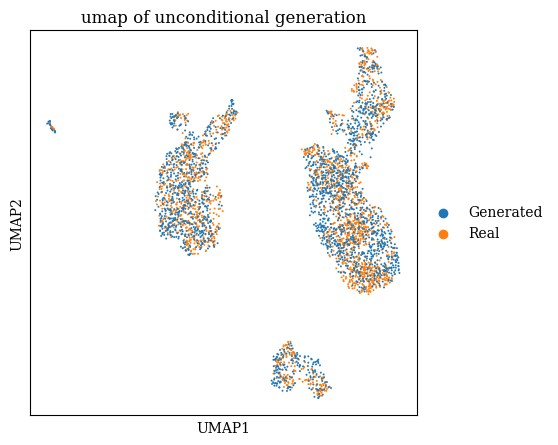

In [75]:
sc.pl.umap(adata_rna, color='dataset_type', size=8, title='umap of unconditional generation',)
